# 1. Get some cutouts

In [19]:
from lensedquasarsurveyor.model_PSF_from_field import download_and_extract, estimate_psf_from_extracted_h5
from lensedquasarsurveyor.formatting import get_J2000_name


ra, dec = 2.83435, -8.7643
name = get_J2000_name(ra, dec)
workdir = f'/tmp/{name}'

savepath_fits, savepath_cutouts_h5 = download_and_extract(ra, dec, workdir, survey='panstarrs')
savepath_fits, savepath_cutouts_h5

INFO: Query finished. [astroquery.utils.tap.core]






this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]

(PosixPath('/tmp/J0011-0845/cutouts_panstarrs_J0011-0845.fits'),
 PosixPath('/tmp/J0011-0845/cutouts_panstarrs_J0011-0845_cutouts.h5'))

The above 
- queried Gaia to know what field size is necessary to have at least one star that can be used to model the PSF in the field. If our lensed quasar isn't in Gaia, then we need to provide a mag_estimate of the lensed images, so we can know what type of stars to look for.
- downloaded all the files available in the specified survey in a fits file.
- extracted cutouts of the stars that can be used for PSF, and of the lens, preserving the WCS information.

# 2. Get a pixelated PSF model with STARRED

In [20]:
estimate_psf_from_extracted_h5(savepath_cutouts_h5)

/home/fred/Documents/starred/starred/psf/loss.py:124: UserWarning: lambda is not normalized. Provide the weight map !
  warnings.warn('lambda is not normalized. Provide the weight map !')
optax.adabelief: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1120.15it/s]
/home/fred/Documents/starred/starred/psf/loss.py:124: UserWarning: lambda is not normalized. Provide the weight map !
  warnings.warn('lambda is not normalized. Provide the weight map !')
optax.adabelief: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

The above added the narrow PSF to the hdf5 file already containing the cutouts. We can use it to model the lensed quasar.

# 3. Model the lensed quasar

In [21]:
from lensedquasarsurveyor.image_fitting_blind import prepare_fitter_from_h5
model = prepare_fitter_from_h5(savepath_cutouts_h5)

/storage/lensedquasarsurveyor/lensedquasarsurveyor/image_fitting_blind.py:559: RuntimeWarning: invalid value encountered in sqrt
  axs[2, i].imshow(p**0.5, origin='lower')


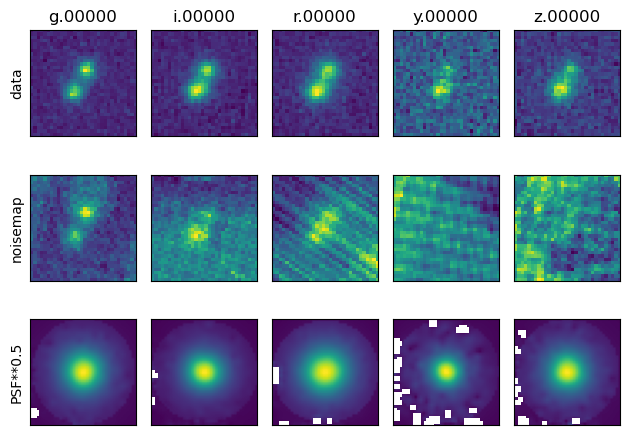

In [22]:
model.view_data()

In [26]:
model.sample(num_warmup=50_000, num_samples=10_000,
             include_galaxy=True, position_scale=10)

sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60000/60000 [01:20<00:00, 745.25it/s, step size 1.67e-01. acc. prob=0.32]



                   mean       std    median      5.0%     95.0%     n_eff     r_hat
   A1_g.00000     49.69      0.60     49.77     48.63     50.56     38.54      1.00
   A1_i.00000    114.50      1.47    114.54    112.08    116.92     22.44      1.02
   A1_r.00000    145.90      1.87    145.86    142.99    149.14     22.65      1.03
   A1_y.00000     95.34      3.99     95.36     89.87    102.65     35.46      1.01
   A1_z.00000     78.91      1.57     79.00     76.44     81.68     19.74      1.01
   A2_g.00000     51.28      0.81     51.25     49.95     52.58     16.51      1.01
   A2_i.00000     89.15      1.30     89.15     87.35     91.69     27.03      1.02
   A2_r.00000    116.03      1.75    116.17    113.36    118.83     19.62      1.04
   A2_y.00000     43.53      4.62     43.81     35.98     51.55     15.60      1.03
   A2_z.00000     44.76      1.31     44.70     42.62     46.94     42.51      1.00
  I_e_g.00000      0.38      0.37      0.26      0.01      0.91     40.20  

Used median params from sampling


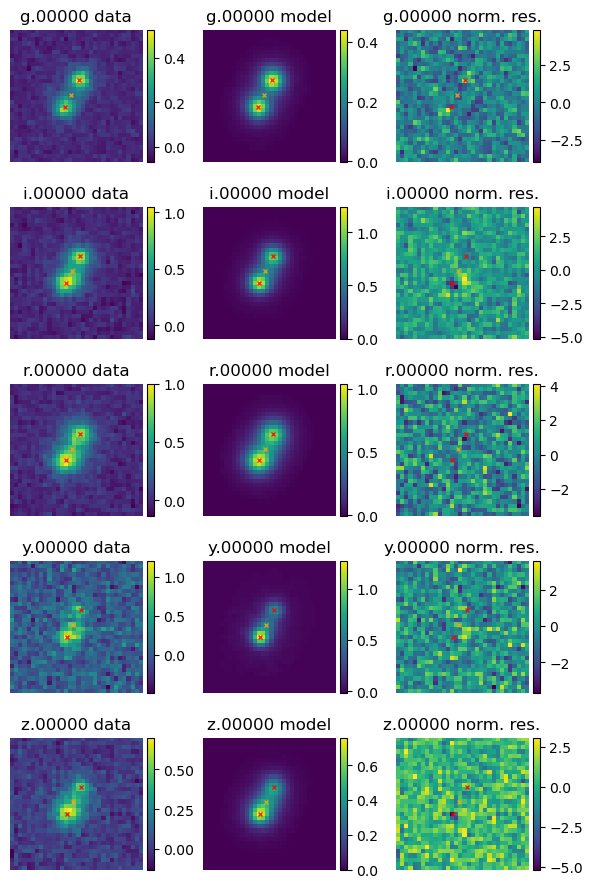

In [27]:
model.plot_model_with_galaxy();

Let's see what the residuals look like with only the point sources subtracted!

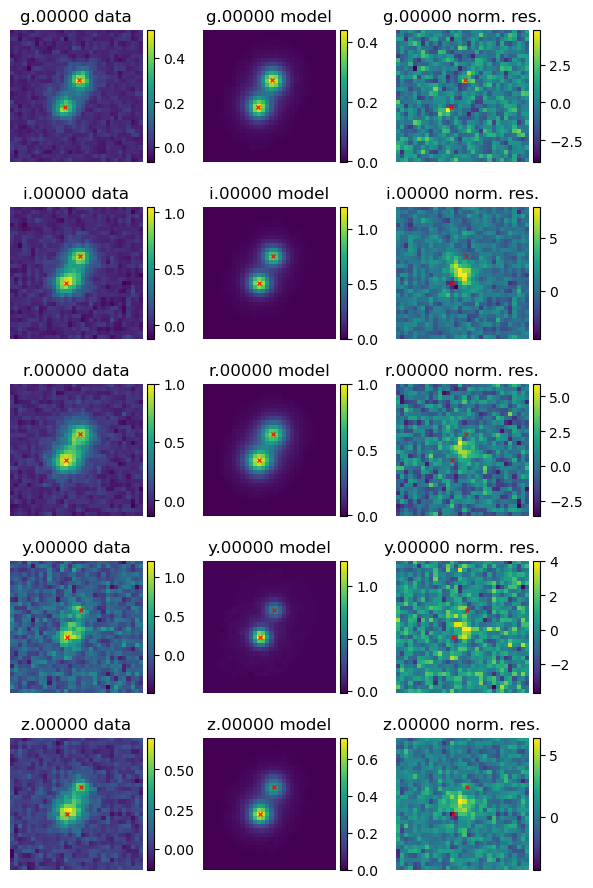

In [28]:
from copy import deepcopy
params = deepcopy(model.param_mediansampler_with_galaxy)  # just recorded those with the sampling above.
# remove the galaxy stuff
del params['galparams']

# now plot with this pruned set of params
fig, axs = model.plot_model_no_galaxy(params)